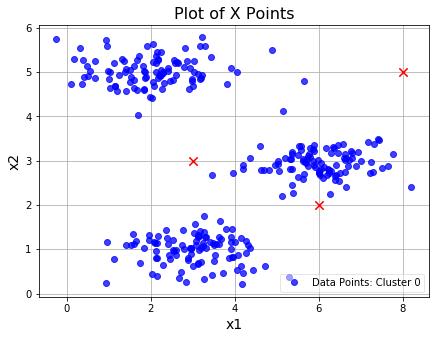

[0 2 1]


C:\Users\Shubhangi\Documents\Assignment\CS 542 ML\python\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


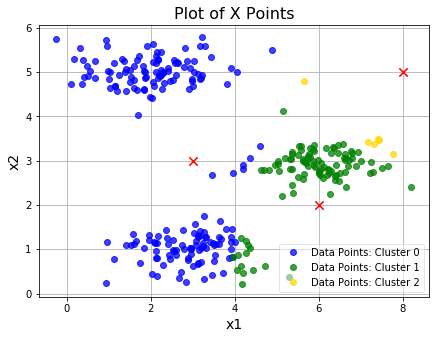

Iteration 0, Finding centroids for all samples...
Recompute centroids...
Iteration 1, Finding centroids for all samples...
Recompute centroids...
Iteration 2, Finding centroids for all samples...
Recompute centroids...
Iteration 3, Finding centroids for all samples...
Recompute centroids...
Iteration 4, Finding centroids for all samples...
Recompute centroids...
Iteration 5, Finding centroids for all samples...
Recompute centroids...
Iteration 6, Finding centroids for all samples...
Recompute centroids...
Iteration 7, Finding centroids for all samples...
Recompute centroids...
Iteration 8, Finding centroids for all samples...
Recompute centroids...
Iteration 9, Finding centroids for all samples...
Recompute centroids...


C:\Users\Shubhangi\Documents\Assignment\CS 542 ML\python\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in true_divide


IndexError: too many indices for array

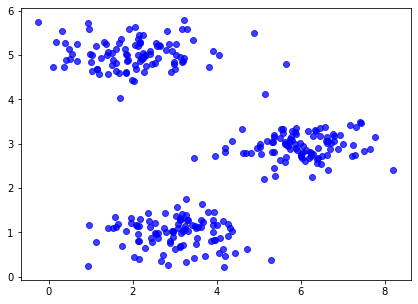

In [138]:
from __future__ import absolute_import

import random

import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import scipy.misc
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min


def plot_data(samples, centroids, clusters=None):
    """
    Plot samples and color it according to cluster centroid.
    :param samples: samples that need to be plotted.
    :param centroids: cluster centroids.
    :param clusters: list of clusters corresponding to each sample.
    """

    colors = ['blue', 'green', 'gold']
    assert centroids is not None

    if clusters is not None:
        sub_samples = []
        for cluster_id in range(centroids[0].shape[0]):
            sub_samples.append(np.array([samples[i] for i in range(samples.shape[0]) if clusters[i] == cluster_id]))
    else:
        sub_samples = [samples]

    plt.figure(figsize=(7, 5))

    for clustered_samples in sub_samples:
        cluster_id = sub_samples.index(clustered_samples)
        plt.plot(clustered_samples[:, 0], clustered_samples[:, 1], 'o', color=colors[cluster_id], alpha=0.75,
                 label='Data Points: Cluster %d' % cluster_id)

    plt.xlabel('x1', fontsize=14)
    plt.ylabel('x2', fontsize=14)
    plt.title('Plot of X Points', fontsize=16)
    plt.grid(True)

    # Drawing a history of centroid movement
    tempx, tempy = [], []
    for mycentroid in centroids:
        tempx.append(mycentroid[:, 0])
        tempy.append(mycentroid[:, 1])

    for cluster_id in range(len(tempx[0])):
        plt.plot(tempx, tempy, 'rx--', markersize=8)

    plt.legend(loc=4, framealpha=0.5)
    plt.show(block=True)




def find_closest_centroids(samples, centroids):
    K = centroids.shape[0]
    
    idx = np.zeros((samples.shape[0],1), dtype=np.int8)
    #print(idx)
    temp = np.zeros((centroids.shape[0],1))
    
    for i in range(samples.shape[0]):
        distances = np.linalg.norm(samples[i] - centroids, axis=1)
        min_dst = np.argmin(distances)
        idx[i] = min_dst
        
    return idx

def get_centroids(samples, clusters):
    m, n = samples.shape[0],samples.shape[1]
    K = len(clusters)
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    
    for i in range(m):
        index = int((clusters[i]-1)[0])
        centroids[index,:]+=samples[i,:]
        count[index]+=1
    
    return centroids/count

def run_k_means(samples, initial_centroids, n_iter):
    """
    Run K-means algorithm. The number of clusters 'K' is defined by the size of initial_centroids
    :param samples: samples.
    :param initial_centroids: a list of initial centroids.
    :param n_iter: number of iterations.
    :return: a pair of cluster assignment and history of centroids.
    """

    centroid_history = []
    current_centroids = initial_centroids
    clusters = []
    for iteration in range(n_iter):
        centroid_history.append(current_centroids)
        print("Iteration %d, Finding centroids for all samples..." % iteration)
        clusters = find_closest_centroids(samples, current_centroids)
        print("Recompute centroids...")
        current_centroids = get_centroids(samples, clusters)

    return clusters, centroid_history


def choose_random_centroids(samples, K):
    m,n = samples.shape[0], samples.shape[1]
    centroids = np.zeros((K,n))
    
    for i in range(K):
        centroids[i] = samples[np.random.randint(0,m+1),:]
        
    return centroids

def main():
    datafile = 'data/data2.mat'
    mat = scipy.io.loadmat(datafile)
    samples = mat['X']
    # samples contain 300 pts, each has two coordinates

    # Choose the initial centroids
    initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
    plot_data(samples, [initial_centroids])
    clusters = find_closest_centroids(samples, initial_centroids)
    # you should see the output [0, 2, 1] corresponding to the
    # centroid assignments for the first 3 examples.
    print(clusters[:3].flatten())
    plot_data(samples, [initial_centroids], clusters)
    clusters, centroid_history = run_k_means(samples, initial_centroids, n_iter=10)
    plot_data(samples, centroid_history, clusters)

    # Let's choose random initial centroids and see the resulting
    # centroid progression plot.. perhaps three times in a row
    for x in range(3):
        clusters, centroid_history = run_k_means(samples, choose_random_centroids(samples, K=3), n_iter=10)
        plot_data(samples, centroid_history, clusters)


if __name__ == '__main__':
    random.seed(7)
    main()
